# The botanist

The botanist is an expert at recognizing vegetal species. Our botanist has a specialty with the iris. Here are 3 species of iris our specialist is able to name:

<div style="display: flex">
    <div style="padding:20px;">
        <img src='https://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg' width=200>
        <p style='text-align: center;'><em>Iris versicolor</em></p>
    </div>
    <div style="padding:20px;">
        <img src='https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/440px-Kosaciec_szczecinkowaty_Iris_setosa.jpg' width=200>
        <p style='text-align: center;'><em>Iris setosa</em></p>
    </div>
    <div style="padding:20px;">
        <img src='https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/1472px-Iris_virginica.jpg' width=200>
        <p style='text-align: center;'><em>Iris virginica</em></p>
    </div>
</div>

Are you able to differentiate them?

## The task

As we know nothing about flowers, let's use a Machine Learning algotithm help us to classify those flowers based on their characteristics.

## Load the dataset

Let's load the Scikit Learn's [Iris dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris) and store it in a DataFrame. You should get:

<img src='https://raw.githubusercontent.com/lewagon/data-images/master/ML/iris_datafame.png' width=600>

In [8]:
# Imports 
from sklearn.datasets import load_iris
import pandas as pd

# Load the iris dataset in an `iris` variable
iris = load_iris()

# Store the iris characteristics in an `iris_df` DataFrame, with their names
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])

# Add a column `species` with the species of each iris
iris_df['species'] = iris['target']
iris_df['species'] = iris_df['species'].apply(lambda x: iris['target_names'][x])

# Display the 5 first iris
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<details>
    <summary>
        💡Hint
    </summary>
    Inspect what is returned by the <code>load_iris</code> method to build the DataFrame.
</details>

❓What are the characteristics of the iris?

Sepal and petal dimensions in `cm`, sepals and petals are part of the flowers.
<img src='https://raw.githubusercontent.com/lewagon/data-images/master/ML/iris_sepal_petal.jpeg' width=200>

❓How many species of iris are there in this dataset?

In [18]:
# YOUR CODE HERE
iris_df['species'].nunique()

3

## Data visualization

Plot the 'petal width' against the 'petal length' with a different color for each species:

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

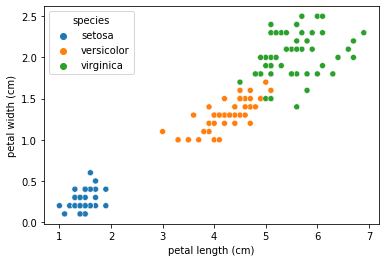

In [20]:
# YOUR PLOT HERE
import seaborn as sns

sns.scatterplot(x='petal length (cm)', y='petal width (cm)', data=iris_df, hue='species')

❓Are you able to differentiate these species based on your observations?

The _Iris setosa_ species seems to have clearly smaller petals than the 2 other species.

ℹ️ You can see that difference matches the observation of the photos

## Modelling

The problem is a multi-class classification task. 

### Specs:
 - Train a Logistic Regression model with a **One-vs-One strategy**
 - The performance metrics should reflect the goal of the task
 - The performance of the model should be **cross-validated**

<details>
<summary> 💡Hint </summary>
There is no parameter to directly specify a OvO multiclass strategy in LogisticRegression. You'll need to find an alternative way to do so 😉
</details>

In [24]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

X = iris_df.drop(columns = "species")
y = iris_df['species']

ovo_log_model = OneVsOneClassifier(LogisticRegression())

cv_results = cross_validate(ovo_log_model,X,y)

cv_results['test_score'].mean()

0.9733333333333334

❓The botanist is able to find the right species 9 times over 10, can you beat him?

<details>
<summary> 👉Solution </summary>
You should get a mean accuracy of 97% which is more than 90%. So our algorithm beats the botanist!

</details>

## 🏁 

Think about pushing you notebook!